# Simulation discrète du modèle microscopique


Ce code présente une validation du modèle microscopique proposé par Chevalier, Le Ny et Malhamé (2015) qui est ensuite généralisé à un modèle de jeu à champ moyen. Le modèle consiste à considérer que chaque conducteur règle sa vitesse par la maximisation d'une fonction d'utilité donné par 
$$f_i = v_i \left( 1 - F\left( \frac1N \sum_{j>i} w(x_j-x_i)\right)\right) -\frac1 2 \alpha v_i^2$$
où les conducteurs sont ordonnés de façon croissante (le conducteur 1 est derrière tout le monde).

On montrera l'application de ce modèle à un nombre de joueurs petit (N=2 et N=3)

In [3]:
# Importation des modules à utiliser
import numpy as np
import matplotlib.pyplot as plt

## Simulation pour deux joueurs




Dans ce cas-ci, les fonctions utilité sont:
$$ f_1 = v_1 \left( 1 - F\left( \frac {w(x_2 - x_1)} 2 \right)\right) -\frac1 2 \alpha v_1^2 $$
$$ f_2 = v_2 - \frac1 2 \alpha v_2^2 $$

Par la suite, on considérera $F(x) = x$ et $w(y) = \frac1{\lambda}e^{-\frac{y}{\lambda}}$ avec $\lambda$ un paramètre que l'on précisera.

Notons que le conducteur 2 peut regler sa vitesse pour qu'elle soit maximale. Cela est cohérent avec le fait que les conducteurs ne prennent en compte que les conducteurs en avant. Ainsi, $v_2 = v_{max} = \frac1{\alpha}$.

Pour le joueur 1, la vitesse doit se calculer à chaque instant et est donnée par : 
$$v_1 = \frac1{\alpha}\left( 1 - \frac1{2\lambda}e^{-\frac{x_2 - x_1}{\lambda}}\right)$$

In [17]:
# Définition de la fonction 
def ModeleDeuxConducteurs(T,N,alpha,lda,x1,x2):
    dt = T/N
    t = np.linspace(0,T,N+1)
    v2max = 1/alpha
    v1 = list()
    for i in range(N):
        v1.append(1/alpha * (1 - 1/(2*lda) * np.exp(-(x2[-1]-x1[-1])/lda)))
        x2.append(x2[-1] + v2max * dt)
        x1.append(x1[-1] + v1[-1] * dt)
    return x1,x2,v1,t

Text(0, 0.5, 'distance (km)')

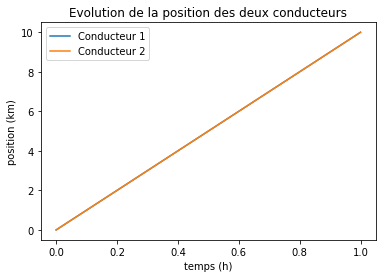

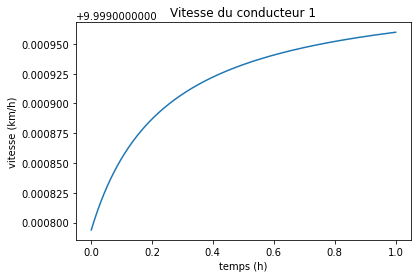

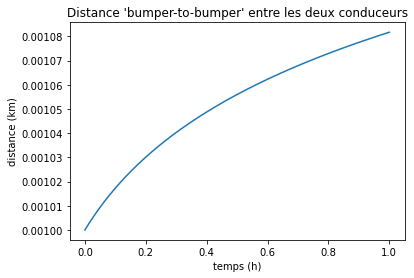

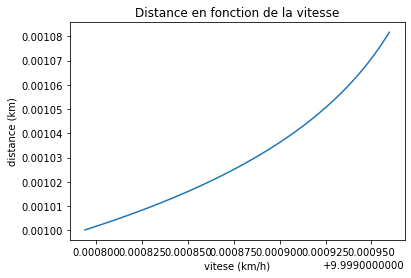

In [18]:
# Définition des paramètres de la simulation
T = 1
N = 1000
alpha = 0.1
x1 = [0]
x2 = [0.001]

EX0 = 1/2 *(x1[0] + x2[0])
VarX0 = 1/2 * ((x1[0] -EX0)**2 + (x2[0] -EX0)**2)
lda = 0.1 * np.sqrt(VarX0) # paramètre lambda

# Plot
x1, x2, v1, t = ModeleDeuxConducteurs(T,N,alpha,lda,x1,x2)
plt.plot(t,x1,label="Conducteur 1")
plt.plot(t,x2,label="Conducteur 2")
plt.legend()
plt.title("Evolution de la position des deux conducteurs")
plt.xlabel("temps (h)")
plt.ylabel("position (km)")
plt.figure()
plt.plot(t[1:],v1)
plt.title("Vitesse du conducteur 1")
plt.xlabel("temps (h)")
plt.ylabel("vitesse (km/h)")
plt.figure()
plt.plot(t,np.array(x2)-np.array(x1))
plt.title("Distance 'bumper-to-bumper' entre les deux conduceurs")
plt.xlabel("temps (h)")
plt.ylabel("distance (km)")
plt.figure()
plt.plot(v1,np.array(x2[1:])-np.array(x1[1:]))
plt.title("Distance en fonction de la vitesse")
plt.xlabel("vitese (km/h)")
plt.ylabel("distance (km)")

In [19]:
def ModeleDeuxConducteursArret(T,N,alpha,lda,x1,x2):
    dt = T/N
    t = np.linspace(0,T,N+1)
    v2max = 1/alpha
    v1 = list()
    v2 = list()
    for i in range(N):
        v2.append(v2max - v2max/N * i)
        v1.append(1/alpha * (1 - 1/(2*lda) * np.exp(-(x2[-1]-x1[-1])/lda)))
        x2.append(x2[-1] + v2[-1] * dt)
        x1.append(x1[-1] + v1[-1] * dt)    
    
    return x1,x2,v1,v2,t

Ici on pourrait montrer que :
* S'ils sont relativement proches au début, le conducteur 1 règle sa vitesse pour s'éloigner
* S'ils sont sufisamment loin l'un de l'autre, ils restent à la même distance
* Le facteur $\frac1N$ ne paraît pas être adapté (prendre le cas w est un delta de Dirac)

Il manque la comparaison avec un autre modèle micro.

## Simulation pour trois joueurs.

Dans ce cas-ci, les fonctions d'utilité sont :
$$ f_1 = v_1 \left( 1 - F\left( \frac1 3 (w(x_3 - x_1) + w(x_2-x_1))\right)\right) -\frac1 2 \alpha v_1^2 $$
$$ f_2 = v_2 \left( 1 - F\left( \frac1 3 w(x_3 - x_2)\right)\right) -\frac1 2 \alpha v_2^2 $$
$$ f_3 = v_3 - \frac1 2 \alpha v_3^2 $$

Nous utiliserons les mêmes fonctions $F$ et $w$ que pour le cas à deux joueurs.

Les vitesses sont données alors par 
$$v_1 = \frac1{\alpha} \left( 1 - \frac1 3(w(x_3-x_1) + w(x_2 - x_1)\right) $$
$$ v_2 = \frac1{\alpha} \left( 1 - \frac1 3 w(x_3-x_2)\right) $$
$$ v_3 = \frac1{\alpha} $$

In [4]:
def ModeleTroisConducteurs(T,N,alpha,lda,x1,x2,x3):
    dt = T/N
    t = np.linspace(0,T,N+1)
    v3max = 1/alpha
    v2 = list()
    v1 = list()
    for i in range(N):
        v1.append(1/alpha * (1 - 1/(3*lda) * (np.exp(-(x2[-1]-x1[-1])/lda) + np.exp(-(x3[-1]-x1[-1])/lda))))
        v2.append(1/alpha * (1 - 1/(3*lda) * np.exp(-(x3[-1]-x2[-1])/lda)))
        x3.append(x3[-1] + v3max * dt)
        x2.append(x2[-1] + v2[-1] * dt)
        x1.append(x1[-1] + v1[-1] * dt) 
    return x1,x2,x3,v1,v2,t

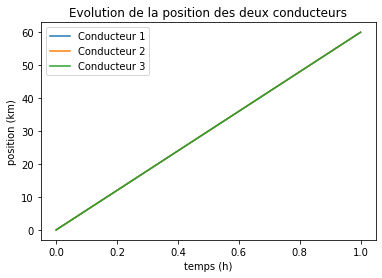

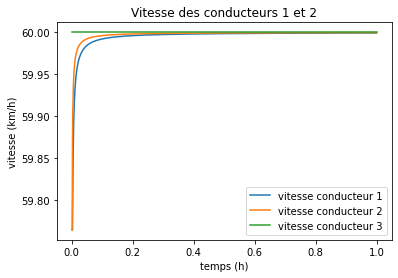

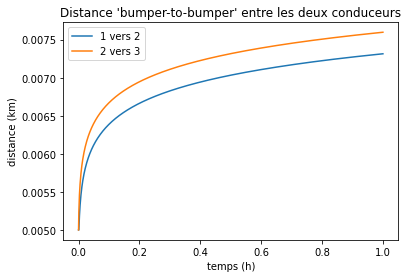

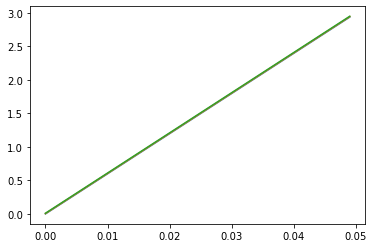

In [5]:
# Définition des paramètres de la simulation
T = 1
N = 1000
alpha = 1/60
x1 = [0]
x2 = [0.005]
x3 = [0.010]

EX0 = 1/3 *(x1[0] + x2[0] + x3[0])
VarX0 = 1/3 * ((x1[0] -EX0)**2 + (x2[0] -EX0)**2 + (x3[0] -EX0)**2)
lda = 0.1 * np.sqrt(VarX0)

# Plot
x1,x2,x3,v1,v2,t = ModeleTroisConducteurs(T,N,alpha,lda,x1,x2,x3)
plt.plot(t,x1,label="Conducteur 1")
plt.plot(t,x2,label="Conducteur 2")
plt.plot(t,x3,label="Conducteur 3")
plt.legend()
plt.title("Evolution de la position des deux conducteurs")
plt.xlabel("temps (h)")
plt.ylabel("position (km)")
plt.figure()
plt.plot(t[1:],v1,label='vitesse conducteur 1')
plt.plot(t[1:],v2,label='vitesse conducteur 2')
plt.plot(t[1:],1/alpha * np.ones(len(t[1:])),label='vitesse conducteur 3')
plt.title("Vitesse des conducteurs 1 et 2")
plt.xlabel("temps (h)")
plt.ylabel("vitesse (km/h)")
plt.legend()
plt.figure()
plt.plot(t,np.array(x2)-np.array(x1),label="1 vers 2")
plt.plot(t,np.array(x3)-np.array(x2),label="2 vers 3")
plt.legend()
plt.title("Distance 'bumper-to-bumper' entre les deux conduceurs")
plt.xlabel("temps (h)")
plt.ylabel("distance (km)")
plt.figure()
plt.plot(t[0:50],x1[0:50],label="Conducteur 1")
plt.plot(t[0:50],x2[0:50],label="Conducteur 2")
plt.plot(t[0:50],x3[0:50],label="Conducteur 3")

In [6]:
lda

0.0004082482904638631

In [7]:
def ModeleNConducteurs(T,Nt,X0,alpha):
    N = len(X0)
    EX0 = 1/N * sum(X0)
    VarX0 = 1/N * sum([(x - EX0)**2 for x in X0])
    lda = 0.1 * np.sqrt(VarX0)
    vmax = 1/alpha
    dt = T/Nt
    t = np.linspace(0,T,Nt+1)
    
    V = [[] for x0 in X0[0:len(X0)-1]]
    X = [[x0] for x0 in X0]
    
    index_joueur = [i for i in range(N)]
    
    for i in range(Nt):
        for j in range(N-1):
            vj = 1/alpha *(1 - 1/(N*lda) * sum([np.exp(-(X[k][-1]-X[j][-1])/lda) for k in index_joueur[j+1:]]))
            V[j].append(vj)
            X[j].append(X[j][-1] + dt * V[j][-1])
        X[-1].append(X[-1][-1] + dt*vmax)
    
    return X,V,t    
    

Text(0, 0.5, 'distance (km)')

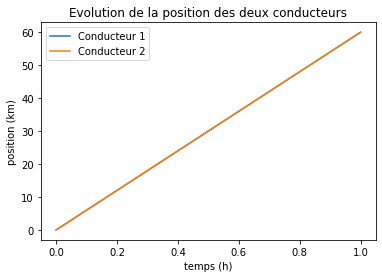

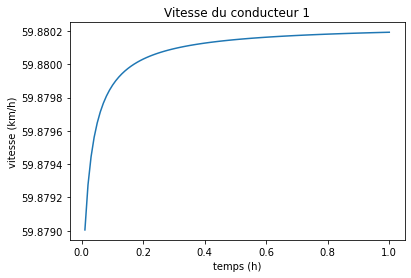

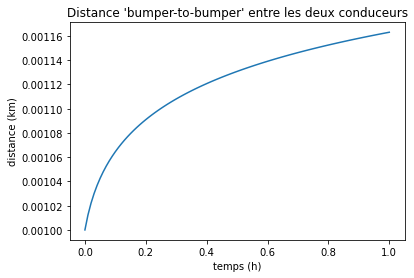

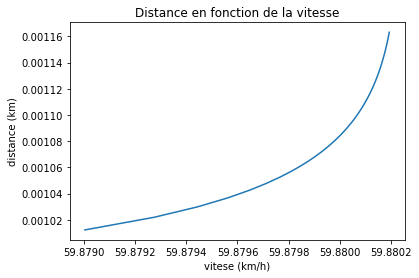

In [8]:
# Définition des paramètres de la simulation
T = 1
Nt = 100
alpha = 0.0167
X0 = [0,0.001]

X,V,t = ModeleNConducteurs(T,Nt,X0,alpha)
x1 = X[0]
x2 = X[1]
v1 = V[0]

plt.plot(t,x1,label="Conducteur 1")
plt.plot(t,x2,label="Conducteur 2")
plt.legend()
plt.title("Evolution de la position des deux conducteurs")
plt.xlabel("temps (h)")
plt.ylabel("position (km)")
plt.figure()
plt.plot(t[1:],v1)
plt.title("Vitesse du conducteur 1")
plt.xlabel("temps (h)")
plt.ylabel("vitesse (km/h)")
plt.figure()
plt.plot(t,np.array(x2)-np.array(x1))
plt.title("Distance 'bumper-to-bumper' entre les deux conduceurs")
plt.xlabel("temps (h)")
plt.ylabel("distance (km)")
plt.figure()
plt.plot(v1,np.array(x2[1:])-np.array(x1[1:]))
plt.title("Distance en fonction de la vitesse")
plt.xlabel("vitese (km/h)")
plt.ylabel("distance (km)")

Text(0, 0.5, 'distance (km)')

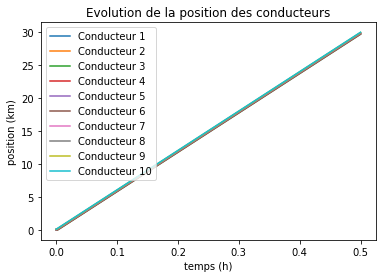

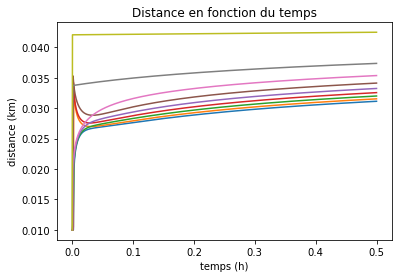

In [9]:
# Définition des paramètres de la simulation
T = 0.5
Nt = 1000
alpha = 0.0167
N = 10
X0 = [0.01 * i for i in range(N)]

X,V,t = ModeleNConducteurs(T,Nt,X0,alpha)

plt.figure
for i in range(N):
    plt.plot(t,X[i],label="Conducteur "+str(i+1))
plt.title("Evolution de la position des conducteurs")
plt.legend()
plt.xlabel("temps (h)")
plt.ylabel("position (km)")
plt.savefig("conducteurs.svg")

plt.figure()
for i in range(N-1):
    plt.plot(t,np.array(X[i+1])-np.array(X[i]),label=str(i) + " vers " + str(i+1))
plt.title("Distance en fonction du temps")
#plt.legend()
plt.xlabel("temps (h)")
plt.ylabel("distance (km)")

Nombre de joueurs grand : N=1000

In [44]:
# Définition des paramètres de la simulation
T = 0.1
Nt = 100
alpha = 1/60
N = 1000
X0 = [0.005 * i for i in range(N)]

X,V,t = ModeleNConducteurs(T,Nt,X0,alpha)

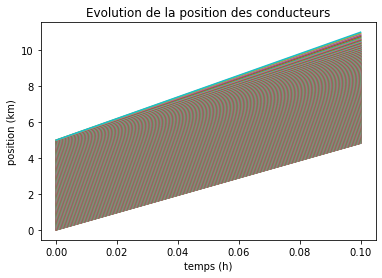

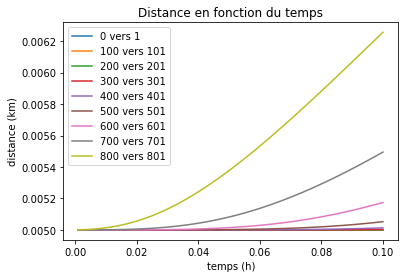

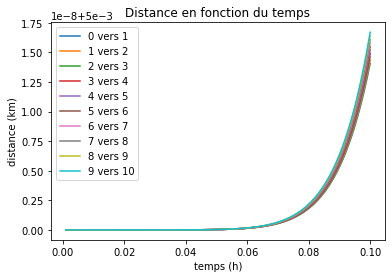

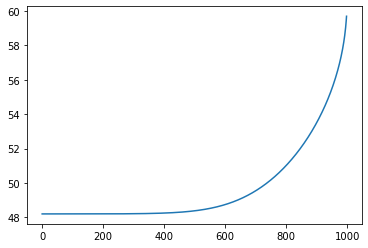

In [45]:
plt.figure
plt.plot(t,np.transpose(X))
plt.title("Evolution de la position des conducteurs")
#plt.legend()
plt.xlabel("temps (h)")
plt.ylabel("position (km)")
plt.savefig("conducteurs.svg")

plt.figure()
for i in range((N-1)//100):
    plt.plot(t[1:],np.array(X[100*i+1][1:])-np.array(X[100*i][1:]),label=str(100*i) + " vers " + str(100*i+1))
plt.title("Distance en fonction du temps")
plt.legend()
plt.xlabel("temps (h)")
plt.ylabel("distance (km)")

plt.figure()
for i in range(10):
    plt.plot(t[1:],np.array(X[i+1][1:])-np.array(X[i][1:]),label=str(i) + " vers " + str(i+1))
plt.title("Distance en fonction du temps")
plt.legend()
plt.xlabel("temps (h)")
plt.ylabel("distance (km)")

plt.figure()
plt.plot([V[i][-1] for i in range(len(V)) ])

A faire :
* Ecriture du passage du discret au continu
* Ecriture de l'obtention des équations
* Bibliographie pour H(m,...) Chercher anr mfg

Text(0, 0.5, '')

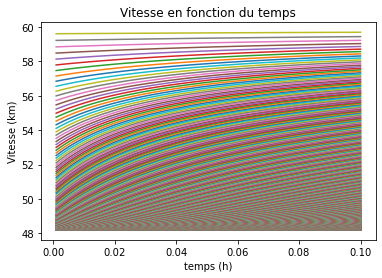

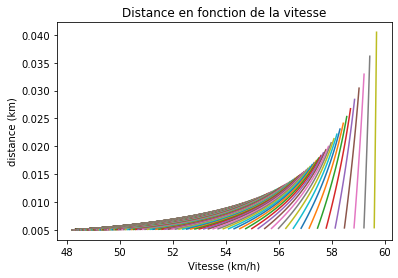

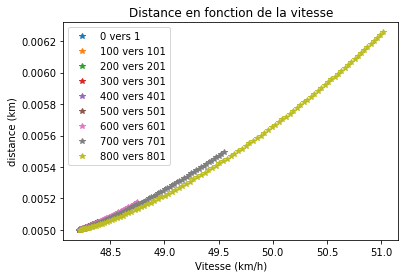

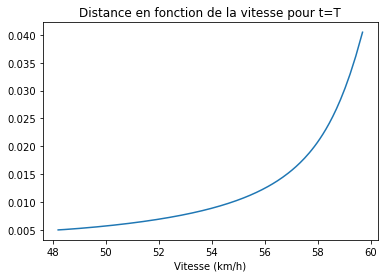

In [47]:
plt.figure()
for i in range(N-1):
    plt.plot(t[1:],V[i],label=str(i) + " vers " + str(i+1))
plt.title("Vitesse en fonction du temps")
#plt.legend()
plt.xlabel("temps (h)")
plt.ylabel("Vitesse (km)")

plt.figure()
for i in range(N-1):
    plt.plot(V[i],np.array(X[i+1][1:])-np.array(X[i][1:]),label=str(i) + " vers " + str(i+1))
plt.title("Distance en fonction de la vitesse")
#plt.legend()
plt.xlabel("Vitesse (km/h)")
plt.ylabel("distance (km)")

plt.figure()
for i in range((N-1)//100):
    plt.plot(V[100*i],np.array(X[100*i+1][1:])-np.array(X[100*i][1:]),"*",label=str(100*i) + " vers " + str(100*i+1))
plt.title("Distance en fonction de la vitesse")
plt.legend()
plt.xlabel("Vitesse (km/h)")
plt.ylabel("distance (km)")

Vfinal = [V[i][-1] for i in range(len(V))]
Xfinal = [X[i][-1] for i in range(len(X))]

plt.figure()
plt.plot(Vfinal,[(Xfinal[i+1]-Xfinal[i]) for i in range(len(X)-1)])
plt.title("Distance en fonction de la vitesse pour t=T")
plt.xlabel("Vitesse (km/h)")
plt.ylabel("")

In [13]:
def CalculDensite(X,pas):
    X = np.array(X)
    rho = [0 for i in range(len(X))]
    for i in range(len(X)):
        proches = np.abs(X-X[i]) < pas
        rho[i] = sum(proches)/pas
    return rho



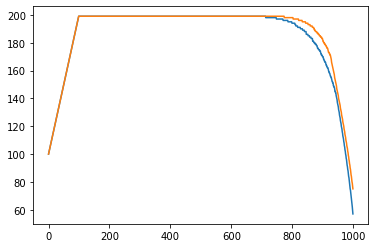

In [14]:
plt.plot(CalculDensite(Xfinal,1))
Xi = [X[i][50] for i in range(len(X))]
plt.plot(CalculDensite(Xi,1))

### Condition d'entrée gaussienne

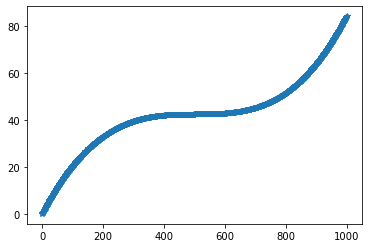

In [15]:
N = 1000
X0 = [0]
for i in range(N-1):
    X0.append(X0[-1] + (i/N - 0.5)**2 + 0.001)

plt.plot(X0,'*')
    
#X,V,t = ModeleNConducteurs(T,Nt,X0,alpha)
